## PRS-Environment Interactions - European Ancestry

In [1]:
## Loading libraries 
suppressPackageStartupMessages({
    library(dplyr)
    library(data.table)
    library(tidyr)
})

## Step 1: Data preparation

df <- read.csv('balanced_dataset_eur.csv', sep = "\t")

In [2]:
head(df)

,IID,age,sex,pop,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,weight,height,whr,townsend,prs_t2d,cmcs,ipvs,diet_score,t2d_cc
,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4357885,67,1,EUR,1,9,5,2,28.2669,7104,607.5,84.6,173,0.8990826,-1.14,1.28946,NA,NA,4,1
2,3890090,53,0,EUR,1,7,2,3,31.2948,6343,2239.0,85.2,165,0.8918919,-1.56,0.64223,0,0,4,1
3,2407498,50,0,EUR,0,7,6,4,20.1092,5498,4125.0,63.0,177,0.7083333,-2.98,0.52749,0,0,5,0
4,4094170,60,1,EUR,1,7,4,4,31.8300,10037,5610.0,112.5,188,0.9363636,-4.90,0.57573,NA,NA,5,1
5,1140987,65,0,EUR,1,7,1,2,28.1083,5535,4944.0,75.6,164,0.8796296,-3.02,0.88092,NA,NA,4,1
6,2383748,63,1,EUR,1,6,3,1,35.0982,7422,0.0,94.4,164,1.1226415,5.04,2.40043,NA,NA,1,1


## 1. Data Preprocessing

In [3]:
### Removing unnecessary columns
library(dplyr)
df <- df %>% select(-c('pop', 'weight', 'height'))

In [4]:
head(df)

,IID,age,sex,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,whr,townsend,prs_t2d,cmcs,ipvs,diet_score,t2d_cc
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4357885,67,1,1,9,5,2,28.2669,7104,607.5,0.8990826,-1.14,1.28946,NA,NA,4,1
2,3890090,53,0,1,7,2,3,31.2948,6343,2239.0,0.8918919,-1.56,0.64223,0,0,4,1
3,2407498,50,0,0,7,6,4,20.1092,5498,4125.0,0.7083333,-2.98,0.52749,0,0,5,0
4,4094170,60,1,1,7,4,4,31.8300,10037,5610.0,0.9363636,-4.90,0.57573,NA,NA,5,1
5,1140987,65,0,1,7,1,2,28.1083,5535,4944.0,0.8796296,-3.02,0.88092,NA,NA,4,1
6,2383748,63,1,1,6,3,1,35.0982,7422,0.0,1.1226415,5.04,2.40043,NA,NA,1,1


### Data standardisation

In [5]:
## Selecting the numerical features
library(dplyr)

cat_col <- c('sex','ever_smoked', 'alcohol_intake', 'av_income')
num_col <- c('age', 'sleep_dur', 'bmi', 'bmr', 'total_met', 'whr', 'prs_t2d','townsend','cmcs','ipvs', 'diet_score')
## standardising the numerical features
df <- df %>%
  mutate(across(all_of(num_col), ~ as.numeric(scale(.))))

In [6]:
head(df)

,IID,age,sex,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,whr,townsend,prs_t2d,cmcs,ipvs,diet_score,t2d_cc
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4357885,1.1208693,1,1,1.4912383,5,2,-0.1928489,0.0777168,-0.7228876,-0.05951201,0.02343923,1.1796213,NA,NA,-0.1443242,1
2,3890090,-0.6982282,0,1,-0.1556027,2,3,0.3477788,-0.4386954,-0.1109089,-0.13569530,-0.11202545,0.5235440,-0.3496491,-0.2893537,-0.1443242,1
3,2407498,-1.0880348,0,0,-0.1556027,6,4,-1.6493961,-1.0121098,0.5965333,-2.08044881,-0.57002507,0.4072356,-0.3496491,-0.2893537,0.5124497,0
4,4094170,0.2113205,1,1,-0.1556027,4,4,0.4433381,2.0680414,1.1535597,0.33547087,-1.18929217,0.4561350,NA,NA,0.5124497,1
5,1140987,0.8609982,0,1,-0.1556027,1,2,-0.2211668,-0.9870017,0.9037418,-0.26561066,-0.58292647,0.7654968,NA,NA,-0.1443242,1
6,2383748,0.6011271,1,1,-0.9790233,3,1,1.0268712,0.2935106,-0.9507620,2.30903479,2.01670520,2.3057776,NA,NA,-2.1146458,1


In [7]:
table(df$t2d_cc)


    0     1 
33542 33542 

## 2. Checking for Marginal (Main effects)

In [8]:
#converting categorical features and factors 
df[cat_col] <- lapply(df[cat_col], as.factor)

In [9]:
## checking the result of the assignment
sapply(df[cat_col], class)

sex    ever_smoked alcohol_intake      av_income 
      "factor"       "factor"       "factor"       "factor"

### 2.1 Checking for Main effects: Numerical Features

# A tibble: 11 × 7
   variable_clean    OR lower_CI upper_CI   p.value p_adj_bonf significance_bonf
   <chr>          <dbl>    <dbl>    <dbl>     <dbl>      <dbl> <chr>            
 1 PRS (T2D)      2.03     1.99     2.07  0          0         True             
 2 Body Mass Ind… 2.97     2.90     3.03  0          0         True             
 3 Waist-Hip Rat… 2.20     2.14     2.27  0          0         True             
 4 Age            1.72     1.69     1.75  0          0         True             
 5 Townsend Index 1.26     1.23     1.28  2.01e-134  2.22e-133 True             
 6 Diet Score     0.920    0.902    0.938 6.00e- 17  6.60e- 16 True             
 7 Childhood Mal… 1.12     1.08     1.16  6.50e- 10  7.15e-  9 True             
 8 Basal Metabol… 0.896    0.859    0.934 2.38e-  7  2.61e-  6 True             
 9 Physical Acti… 0.949    0.930    0.969 4.30e-  7  4.73e-  6 True             
10 Intimate Part… 1.06     1.02     1.10  3.09e-  3  3.40e-  2 True             
11 Sleep 

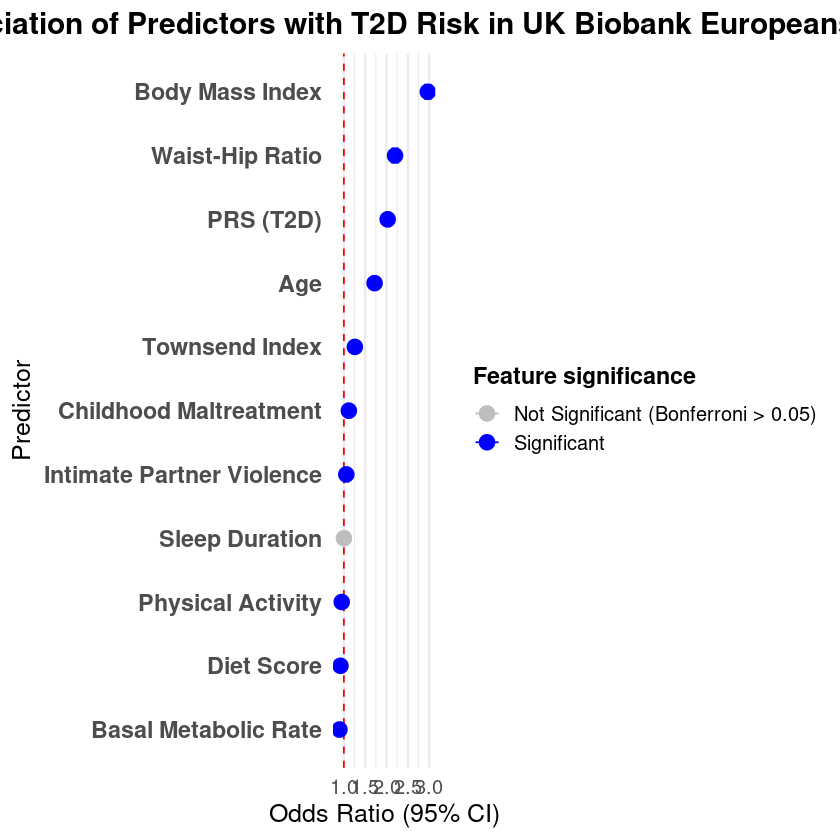

In [10]:
# ---- Libraries ----
library(dplyr)
library(broom)
library(ggplot2)

# ---- Define features ----
env_features <- c(
  "prs_t2d", "bmi", "whr", "diet_score", "bmr", "townsend", 
  "total_met", "cmcs", "ipvs", "av_income", "alcohol_intake", 
  "sleep_dur", "age"
)

# ---- Run logistic regressions ----
all_results <- lapply(env_features, function(featr) {
 formula <- as.formula(paste("t2d_cc ~", featr))
 model <- glm(formula, data = df, family = binomial)
  
 tidy(model) %>%
   mutate(variable = featr) %>%
   filter(term == featr)  # keep only the coefficient for that feature
}) %>% bind_rows()

# # ---- Define covariates ----
# base_covars <- c("bmi", "sex", "age", "ever_smoked")

# # ---- Run logistic regressions with covariate adjustment ----
# all_results <- lapply(env_features, function(featr) {
  
#   # Remove the feature from covariates if it is also a covariate
#   covars_to_use <- setdiff(base_covars, featr)
  
#   # Build formula: t2d_cc ~ feature + covariates
#   formula <- as.formula(
#     paste("t2d_cc ~", paste(c(featr, covars_to_use), collapse = " + "))
#   )
  
#   model <- glm(formula, data = df, family = binomial)
  
#   tidy(model) %>%
#     mutate(variable = featr) %>%
#     filter(term == featr)   # keep only main predictor effect
# }) %>% bind_rows()
# ---- Apply Bonferroni correction ----
all_results <- all_results %>%
  mutate(
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significance_bonf = ifelse(p_adj_bonf < 0.05, "True", "False")
  )

# ---- Define variable labels ----
labels_map <- c(
  prs_t2d = "PRS (T2D)",
  bmi = "Body Mass Index",
  whr = "Waist-Hip Ratio",
  diet_score = "Diet Score",
  bmr = "Basal Metabolic Rate",
  townsend = "Townsend Index",
  total_met = "Physical Activity",
  cmcs = "Childhood Maltreatment",
  ipvs = "Intimate Partner Violence",
  av_income = "Average Income",
  alcohol_intake = "Alcohol Intake",
  sleep_dur = "Sleep Duration",
  age = "Age"
)

# ---- Compute OR, CI, and relabel variables ----
plot_data <- all_results %>%
  mutate(
    OR = exp(estimate),
    lower_CI = exp(estimate - 1.96 * std.error),
    upper_CI = exp(estimate + 1.96 * std.error),
    variable_clean = recode(variable, !!!labels_map)
  )

# ---- Create forest plot ----
plot_final <- ggplot(plot_data, aes(x = OR, y = reorder(variable_clean, OR), color = significance_bonf)) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  geom_point(size = 4) +
  geom_errorbarh(aes(xmin = lower_CI, xmax = upper_CI), height = 0.25) +
  scale_color_manual(
    values = c("True" = "blue", "False" = "gray"),
    name = "Feature significance",
    labels = c("True" = "Significant ", "False" = "Not Significant (Bonferroni > 0.05)")
  ) +
  labs(
    x = "Odds Ratio (95% CI)",
    y = "Predictor",
    title = "Association of Predictors with T2D Risk in UK Biobank Europeans"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
    axis.text.y = element_text(face = "bold", size = 14),
    axis.text.x = element_text(size = 12),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12),
    panel.grid.major.y = element_blank()
  )

# ---- Display plot ----
print(plot_final)

# ---- Show table with Bonferroni-adjusted p-values ----
final_table <- plot_data %>%
  select(variable_clean, OR, lower_CI, upper_CI, p.value, p_adj_bonf, significance_bonf) %>%
  arrange(p_adj_bonf)

print(final_table)
write.table(
  final_table,
  file = "finale_num_predictors_eur.csv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)

In [11]:
ggsave("finale_predict_num_eur.png", width = 12, height = 10, dpi = 300)

### 2.2 Checking for Main effects: Categorical Features


Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose




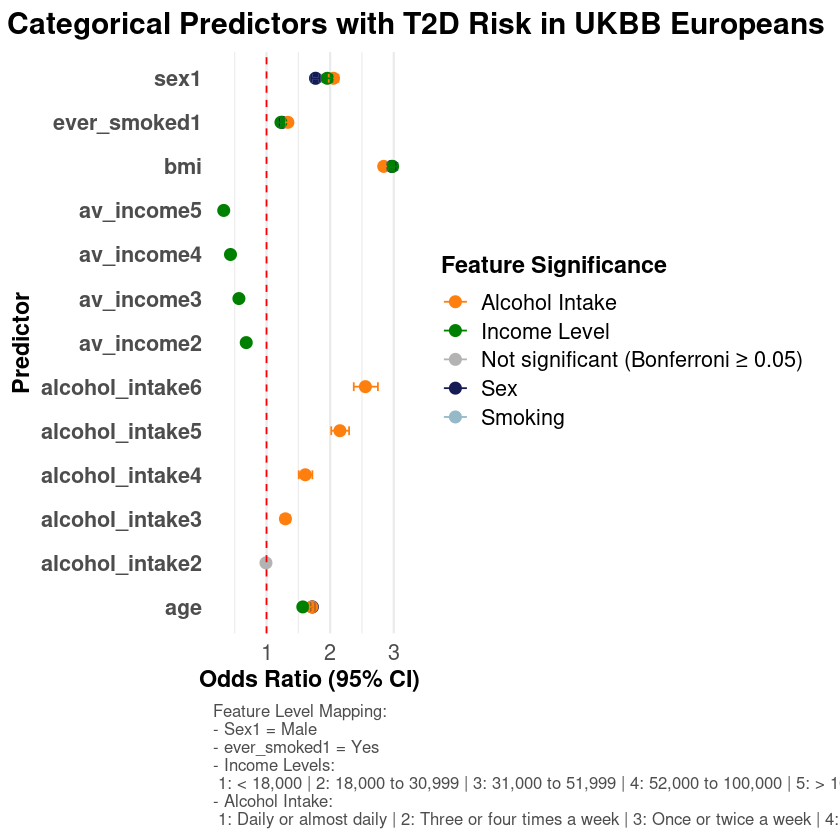

In [12]:
# ---- Load Libraries ----
library(dplyr)
library(broom)
library(ggplot2)
library(purrr)

# ---- Fit Logistic Models ----
main_smoking <- glm(t2d_cc ~ ever_smoked, data = df, family = binomial)
main_sex     <- glm(t2d_cc ~ sex, data = df, family = binomial)
main_alcohol_relevel <- glm(t2d_cc ~ alcohol_intake, data = df, family = binomial)
main_income  <- glm(t2d_cc ~ av_income, data = df, family = binomial)

## ---- Store all models in a named list ----
model_list <- list(
 "Alcohol Intake" = main_alcohol_relevel,
 "Income Level"   = main_income,
 "Sex"            = main_sex,
 "Smoking"        = main_smoking
)

# ---- Fit Logistic Models with covariate adjustment ----
# model_list <- lapply(cat_col, function(var) {
  
#   # Remove the predictor from covariates if overlapping
#   covars_to_use <- setdiff(base_covars, var)
  
#   formula <- as.formula(
#     paste("t2d_cc ~", paste(c(var, covars_to_use), collapse = " + "))
#   )
  
#   glm(formula, data = df, family = binomial)
# })

# names(model_list) <- c("Smoking", "Sex", "Alcohol Intake", "Income Level")

# ---- Function to process models ----
process_model <- function(model, label) {
  tidy(model) %>% 
    mutate(
      lower      = estimate - 1.96 * std.error,
      upper      = estimate + 1.96 * std.error,
      variable   = label,
      odds_ratio = exp(estimate),
      lower_or   = exp(lower),
      upper_or   = exp(upper)
    ) %>%
    filter(term != "(Intercept)")
}

# ---- Apply to all models and combine ----
combined_df <- imap_dfr(model_list, process_model)

# ---- Apply Bonferroni correction ----
combined_df <- combined_df %>%
  mutate(
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significant_bonf = p_adj_bonf < 0.05
  )

# ---- Define colors ----
variable_colors <- c(
  "Alcohol Intake" = "#ff7f0e",
  "Income Level"   = "#008000",
  "Sex"            = "#151B54",
  "Smoking"        = "#95B9C7"
)

# ---- Update coloring based on Bonferroni-adjusted significance ----
combined_df <- combined_df %>%
  mutate(plot_group = ifelse(significant_bonf, variable, "Not significant"))

plot_colors <- c(variable_colors, "Not significant" = "gray70")

# ---- Define Feature Legend Text ----
feature_legend <- paste(
  "Feature Level Mapping:",
  "\n- Sex1 = Male",
  "\n- ever_smoked1 = Yes",
  "\n- Income Levels:",
  "\n 1: < 18,000 |",  " 2: 18,000 to 30,999 |",  " 3: 31,000 to 51,999 |",  " 4: 52,000 to 100,000 |",  " 5: > 100,000",
  "\n- Alcohol Intake:",
  "\n 1: Daily or almost daily |",  " 2: Three or four times a week |",  " 3: Once or twice a week |",  " 4: One to three times a month |",
    " 5: Special occasions only |",  " 6: Never",
  sep = ""
)

# ---- Plot Odds Ratios with Bonferroni Significance ----
plot2 <- ggplot(combined_df, aes(x = term, y = odds_ratio)) +
  geom_point(aes(color = plot_group), size = 3) +
  geom_errorbar(aes(ymin = lower_or, ymax = upper_or, color = plot_group), width = 0.2) +
  scale_color_manual(
    values = plot_colors,
    name = "Feature Significance",
    labels = function(x) ifelse(x == "Not significant", "Not significant (Bonferroni ≥ 0.05)", x)
  ) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(
    title = "Association of Categorical Predictors with T2D Risk in UKBB Europeans",
    #subtitle = "Bonferroni-adjusted significance (α = 0.05)",
    x = "Predictor",
    y = "Odds Ratio (95% CI)",
    caption = feature_legend
  ) +
  theme_minimal(base_size = 14) +  # <--- increases all base font sizes
  theme(
    legend.position = "right",
    legend.text = element_text(size = 13),
    legend.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    plot.caption = element_text(size = 10, hjust = 0, color = "gray30"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 13),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "bold")
  )

# ---- Print Plot ----
print(plot2)

# ---- Optional: View Table of Adjusted Results ----

cat_table_eur <- combined_df %>%
  select(variable, term, odds_ratio, lower_or, upper_or, p.value, p_adj_bonf, significant_bonf) %>%
  arrange(p_adj_bonf)

write.table(
  cat_table_eur,
  file = "finale_cat_predictors_eur.csv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)

In [13]:
ggsave("finale_predict_cat_eur.png", width = 12, height = 8, dpi = 300)

in R, the logistic regression model automatcally treats alcohol_intake1 (the first category: "Daily or almost daily") as the reference category. <br>
**meaning:**<br>
    alcohol_intake2 (3–4 times/week drinkers) have 0.39 higher log-odd of T2D with respect to daily drinkers

We can change the reference to Never drinkers and see the difference
<code>
df$alcohol_intake <- relevel(factor(df$alcohol_intake), ref = "6")  # Now "Never" is reference
main_alcohol_relevel <- glm(t2d_cc ~ alcohol_intake, data = df, family = binomial)
summary(main_alcohol_relevel)
</code>

## 3. PRS - Environment Interaction testing

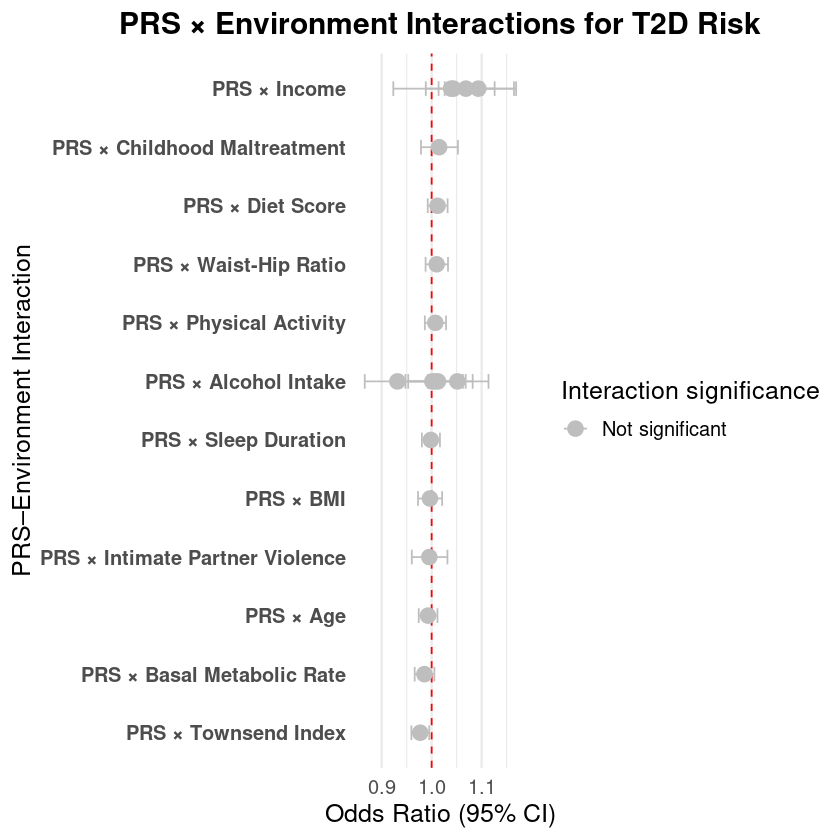

In [40]:
### Define PRS interaction features
interaction_features <- c(
  "bmi", "whr", "diet_score", "bmr", "townsend",
  "total_met", "cmcs", "ipvs", "av_income",
  "alcohol_intake", "sleep_dur", "age"
)

## Run PRS-feature interaction models
library(dplyr)
library(broom)
library(purrr)

interaction_results <- lapply(interaction_features, function(feat) {

  formula <- as.formula(
    paste("t2d_cc ~ prs_T2D +", feat, "+ prs_T2D:", feat)
  )

  model <- glm(formula, data = df, family = binomial)

  tidy(model) %>%
    filter(grepl("prs_T2D:", term)) %>%
    mutate(
      feature = feat,
      # Extract level name if factor (text after feature name)
      level = gsub(paste0("prs_T2D:", feat), "", term),
      level = ifelse(level == "", "Continuous", level)
    )
}) %>% bind_rows()

### Compute Odds Ratios, CI, and Bonferroni correction
interaction_results <- interaction_results %>%
  mutate(
    OR = exp(estimate),
    lower_CI = exp(estimate - 1.96 * std.error),
    upper_CI = exp(estimate + 1.96 * std.error),
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significant_bonf = p_adj_bonf < 0.05
  )
### apply readable labels
interaction_labels <- c(
  bmi = "PRS × BMI",
  whr = "PRS × Waist-Hip Ratio",
  diet_score = "PRS × Diet Score",
  bmr = "PRS × Basal Metabolic Rate",
  townsend = "PRS × Townsend Index",
  total_met = "PRS × Physical Activity",
  cmcs = "PRS × Childhood Maltreatment",
  ipvs = "PRS × Intimate Partner Violence",
  av_income = "PRS × Income",
  alcohol_intake = "PRS × Alcohol Intake",
  sleep_dur = "PRS × Sleep Duration",
  age = "PRS × Age"
)

interaction_results <- interaction_results %>%
  mutate(
    interaction_label = case_when(
      level == "Continuous" ~ recode(feature, !!!interaction_labels),
      TRUE ~ paste0(recode(feature, !!!interaction_labels), " (Level ", level, ")")
    )
  )

## forest plot for PRS-feature interactions 
library(ggplot2)

forest_interaction <- ggplot(
  interaction_results,
  aes(
    x = OR,
    y = reorder(interaction_label, OR),
    color = significant_bonf
  )
) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  geom_point(size = 4) +
  geom_errorbarh(
    aes(xmin = lower_CI, xmax = upper_CI),
    height = 0.25
  ) +
  scale_color_manual(
    values = c("TRUE" = "blue", "FALSE" = "gray"),
    labels = c("TRUE" = "Significant (Bonferroni < 0.05)",
               "FALSE" = "Not significant"),
    name = "Interaction significance"
  ) +
  labs(
    x = "Odds Ratio (95% CI)",
    y = "PRS–Environment Interaction",
    title = "PRS × Environment Interactions for T2D Risk"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    axis.text.y = element_text(face = "bold"),
    panel.grid.major.y = element_blank()
  )

print(forest_interaction)
### Export interaction results to .tsv
interaction_table <- interaction_results %>%
  select(
    feature,
    level,
    interaction_label,
    OR,
    lower_CI,
    upper_CI,
    p.value,
    p_adj_bonf,
    significant_bonf
  ) %>%
  arrange(p_adj_bonf)

write.table(
  interaction_table,
  file = "prs_environment_interactions_eur.tsv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)


In [41]:
ggsave("prsxfeature_eur.png", width = 12, height = 8, dpi = 300)